In [93]:
from glossary_eval import get_sr2terms
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import os
import csv
from collections import defaultdict
import tqdm
import numpy as np
import matplotlib as mpl
from scipy.stats import mannwhitneyu
mpl.rcParams['figure.dpi'] = 300

In [111]:
ROOT = '/data0/lucy/ingroup_lang/'
LOG_DIR = ROOT + 'logs/' 
SENSE_PMI_DIR = LOG_DIR + 'finetuned_sense_pmi/'
BASE_SENSE_PMI_DIR = LOG_DIR + 'base_sense_pmi/'
TYPE_PMI_DIR = LOG_DIR + 'pmi/'

## Finetuned Sense PMI

In [95]:
sr2terms = get_sr2terms()

In [120]:
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(SENSE_PMI_DIR))): 
    subreddit = filename.replace('.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(SENSE_PMI_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['sense'].split('#####')[0]
            score = float(row['pmi'])
            w2score[w].append(score)
        for w in w2score: 
            if w in gloss_terms: 
                gloss_vals.append(max(w2score[w]))
            else: 
                not_gloss_vals.append(max(w2score[w]))

100%|██████████| 474/474 [00:04<00:00, 118.04it/s]


In [97]:
print(ttest_ind(gloss_vals, not_gloss_vals))
print(mannwhitneyu(gloss_vals, not_gloss_vals, alternative='greater'))

Ttest_indResult(statistic=52.33533818498425, pvalue=0.0)
MannwhitneyuResult(statistic=122073681.5, pvalue=3.7826169393568593e-171)


/data0/lucy/anaconda2/envs/bert/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.
/data0/lucy/anaconda2/envs/bert/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


Text(0.5, 0, 'max sense pmi')

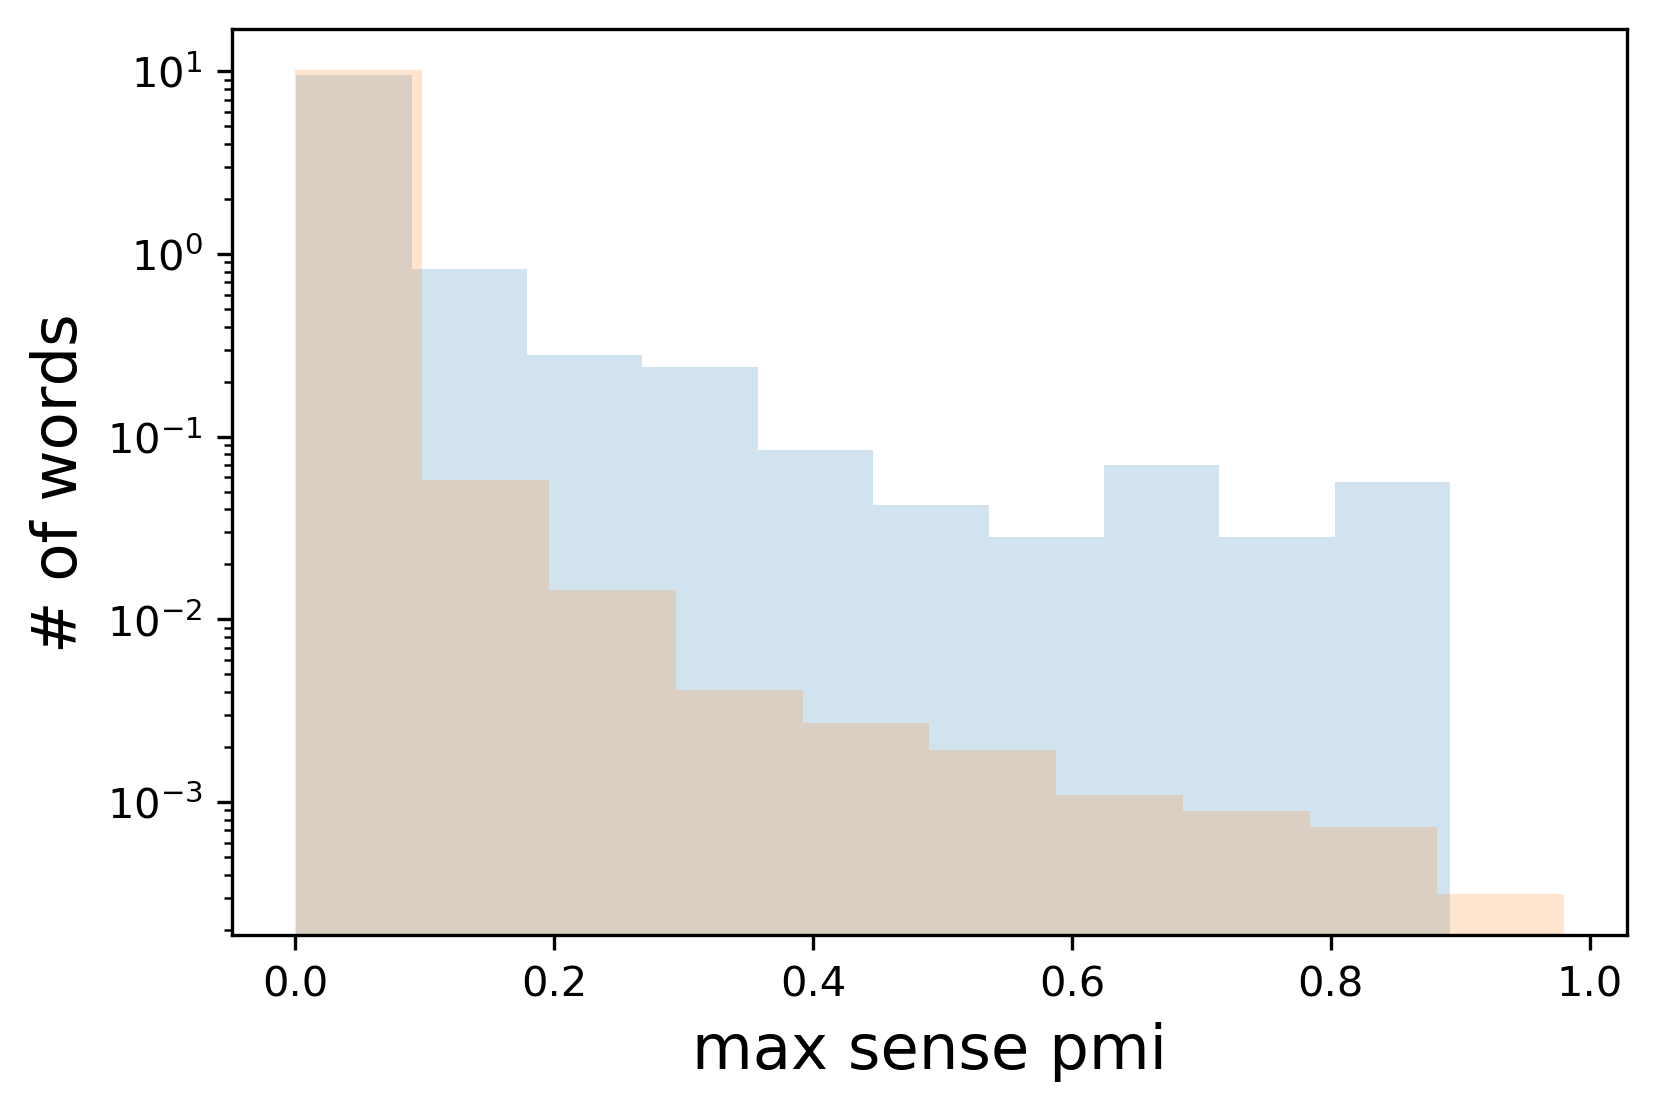

In [122]:
plt.hist(gloss_vals, label="glossary", alpha=0.2, normed=True)
plt.hist(not_gloss_vals, label="non-glossary", alpha=0.2, normed=True)
plt.yscale('log')
plt.ylabel('# of words', fontsize=15)
plt.xlabel('max sense pmi', fontsize=15)

In [99]:
print(np.mean(gloss_vals))
print(np.mean(not_gloss_vals))

0.05594952475864455
0.009187651178210542


## Base Sense PMI

In [115]:
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(BASE_SENSE_PMI_DIR))): 
    subreddit = filename.replace('.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(BASE_SENSE_PMI_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['sense'].split('#####')[0]
            score = float(row['pmi'])
            w2score[w].append(score)
        for w in w2score: 
            if w in gloss_terms: 
                gloss_vals.append(max(w2score[w]))
            else: 
                not_gloss_vals.append(max(w2score[w]))

100%|██████████| 474/474 [00:03<00:00, 128.16it/s]


In [116]:
print(ttest_ind(gloss_vals, not_gloss_vals))
print(mannwhitneyu(gloss_vals, not_gloss_vals, alternative='greater'))
print(np.mean(gloss_vals))
print(np.mean(not_gloss_vals))

Ttest_indResult(statistic=53.76796431586944, pvalue=0.0)
MannwhitneyuResult(statistic=122720753.5, pvalue=4.1547485145318805e-176)
0.050716936428456816
0.008583228826353293


/data0/lucy/anaconda2/envs/bert/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.
/data0/lucy/anaconda2/envs/bert/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


Text(0.5, 0, 'max sense pmi')

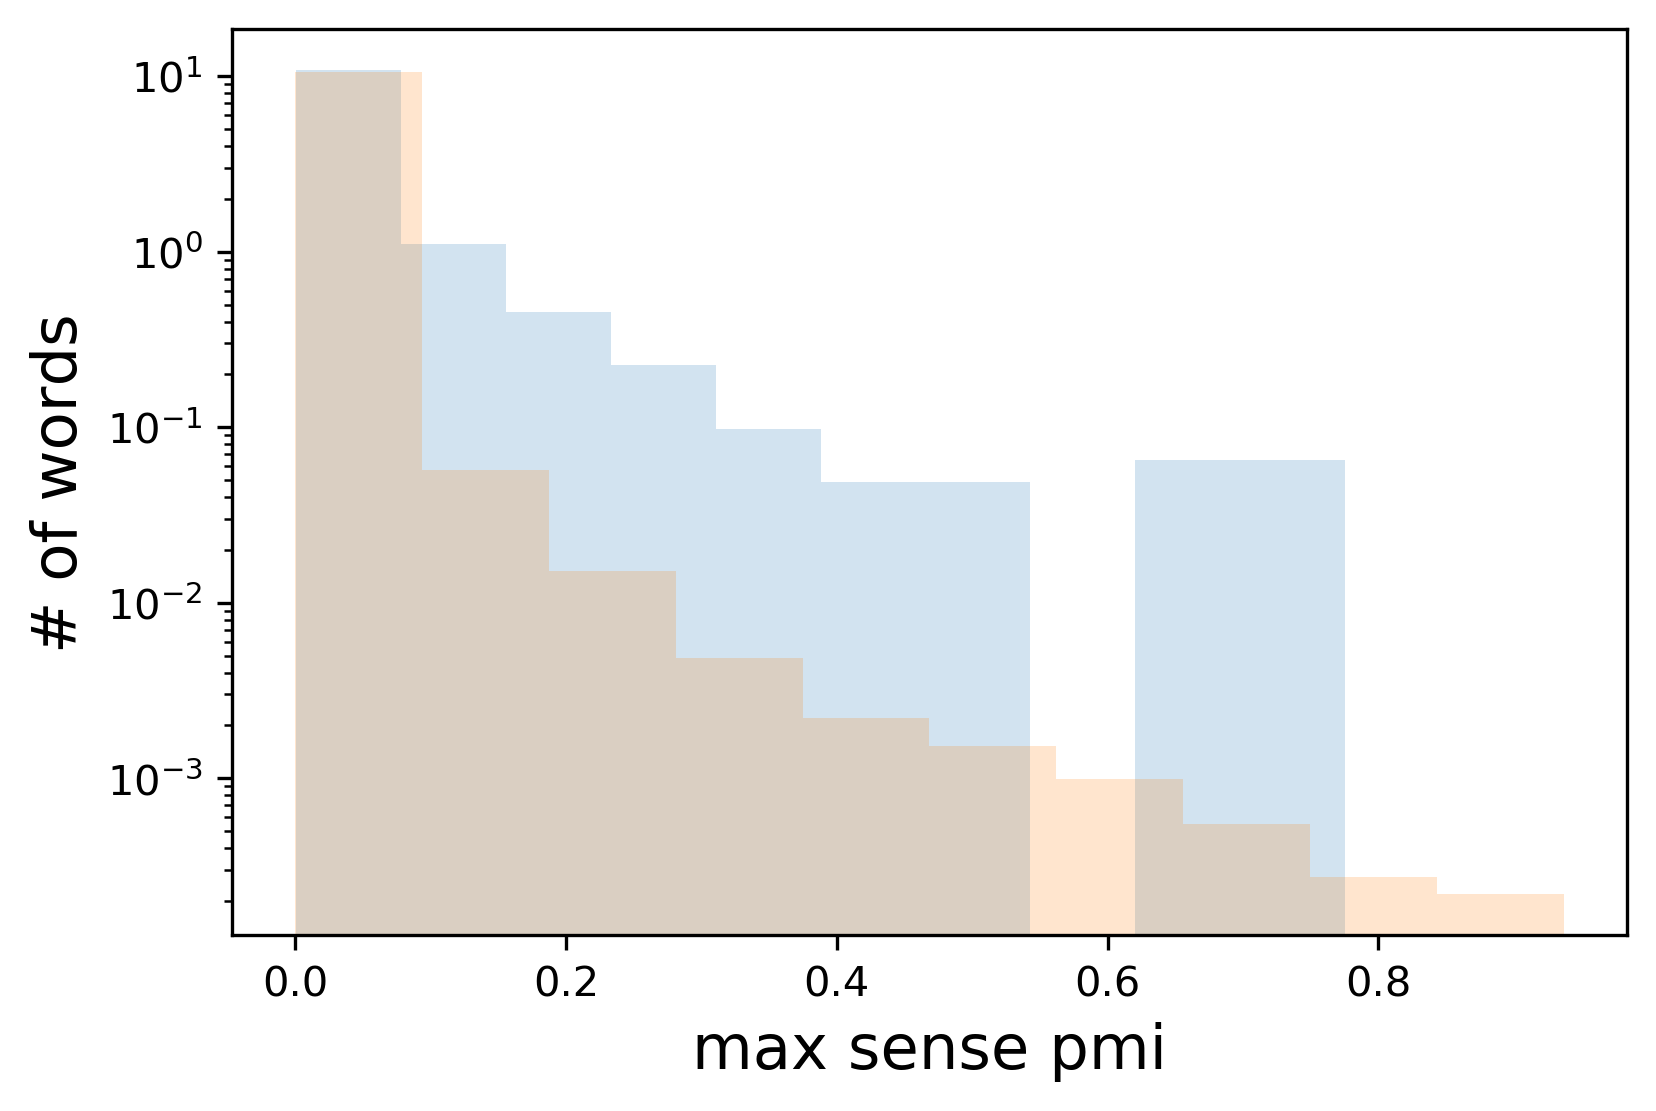

In [119]:
plt.hist(gloss_vals, label="glossary", alpha=0.2, normed=True)
plt.hist(not_gloss_vals, label="non-glossary", alpha=0.2, normed=True)
plt.yscale('log')
plt.ylabel('# of words', fontsize=15)
plt.xlabel('max sense pmi', fontsize=15)

## Type PMI

In [100]:
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(TYPE_PMI_DIR))): 
    subreddit = filename.replace('_0.2.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(TYPE_PMI_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['pmi'])
            if w in gloss_terms: 
                gloss_vals.append(score)
            else: 
                not_gloss_vals.append(score)

100%|██████████| 474/474 [00:01<00:00, 308.05it/s]


/data0/lucy/anaconda2/envs/bert/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.
/data0/lucy/anaconda2/envs/bert/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


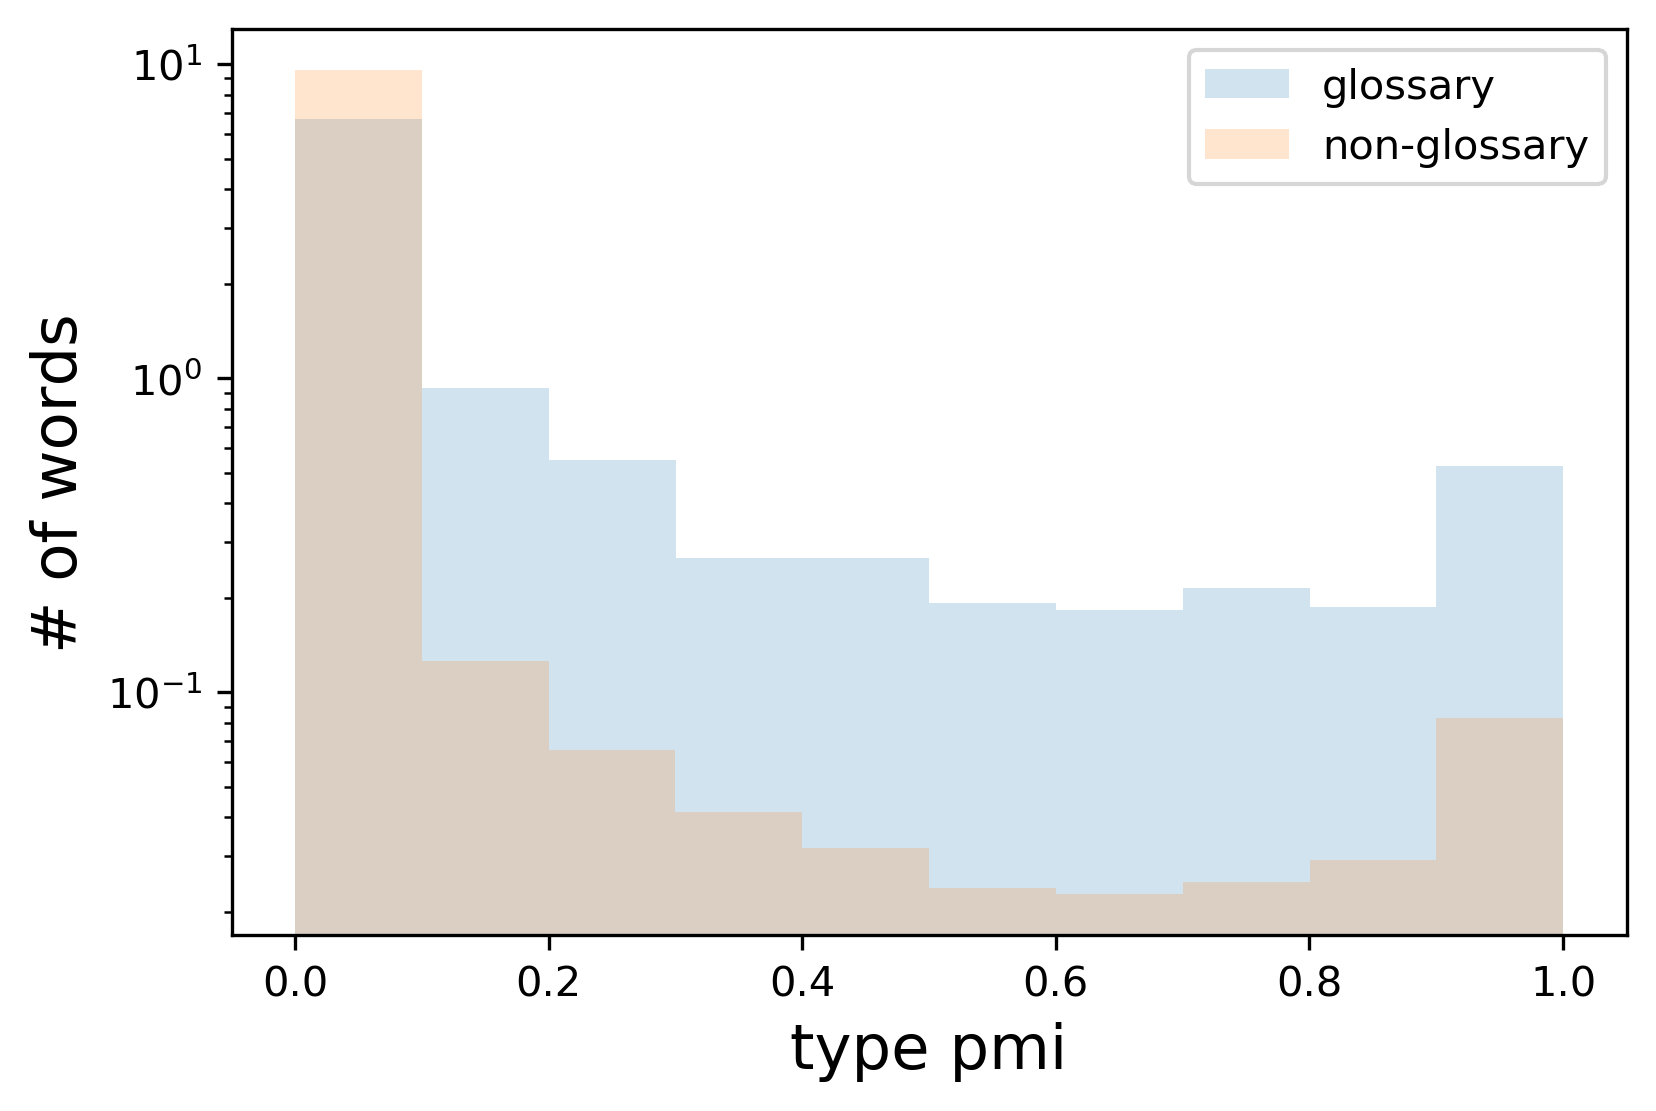

In [101]:
plt.hist(gloss_vals, label="glossary", alpha=0.2, normed=True)
plt.hist(not_gloss_vals, label="non-glossary", alpha=0.2, normed=True)
plt.yscale('log')
plt.ylabel('# of words', fontsize=15)
plt.xlabel('type pmi', fontsize=15)
plt.legend()

In [102]:
print(ttest_ind(gloss_vals, not_gloss_vals))
print(mannwhitneyu(gloss_vals, not_gloss_vals, alternative='greater'))

Ttest_indResult(statistic=53.63694201629838, pvalue=0.0)
MannwhitneyuResult(statistic=758148323.5, pvalue=0.0)


In [103]:
print(np.mean(gloss_vals))
print(np.mean(not_gloss_vals))

0.16822363961140904
0.027510307871176597
